In [1]:
#check_orbits.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#evolve a handful of unperturbed particles having 1e-8 < e < 1e-2 particles for 10^5 orbits
#and show that the fractional variations in a and e are tiny

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

r.shape =  (1001, 51, 3)
total_ring_mass =  0.0
shear_viscosity =  -1.0
bulk_viscosity =  -1.0
initial_orbits =  {'shape': 'log-e', 'e': (1e-08, 0.01)}
e.min() =  1.5420261413371572e-08
e.max() =  0.009634656715102337


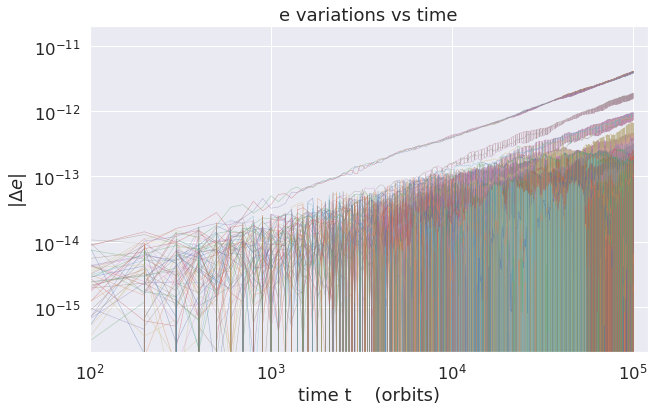

In [4]:
#plot de vs time
f, ax = plt.subplots(figsize=(10, 6))
for sidx in range(number_of_streamlines):
    for pidx in range(particles_per_streamline):
        et = e[:, sidx, pidx]
        de = et - et[0]
        p = ax.plot(times/(2.0*np.pi), de, linestyle='-',
            linewidth=0.5, alpha=0.5)
p = ax.set_xscale('log')
p = ax.set_yscale('log')
p = ax.set_xlim(100, 1.2e5)
p = ax.set_ylim(2.0e-16, 2.0e-11)
p = ax.set_title('e variations vs time')
p = ax.set_xlabel('time t    (orbits)')
p = ax.set_ylabel('$|\Delta e|$')

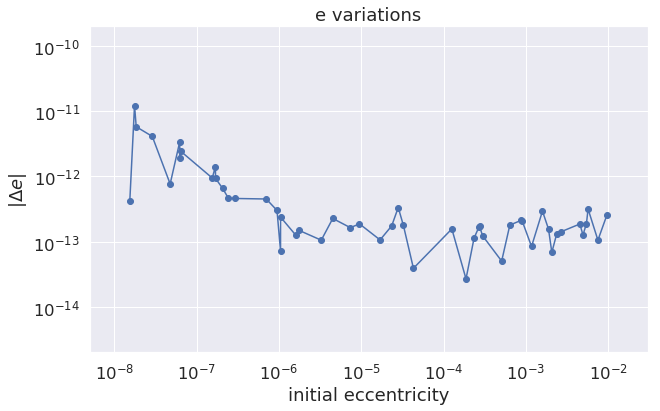

In [5]:
#plot each streamline's max|de| versus initial e
delta_e = np.abs(e[-1] - e[0])
delta_e_max = np.array([de.max() for de in delta_e])
e0 = e[0,:,0]
idx = e0.argsort()
e0 = e0[idx]
delta_e_max = delta_e_max[idx]
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(e0, delta_e_max, marker='o', linestyle='-')
p = ax.set_xscale('log')
p = ax.set_yscale('log')
p = ax.set_xlim(5.0e-9, 3.0e-2)
p = ax.set_ylim(2.0e-15, 2.0e-10)
p = ax.set_title('e variations')
p = ax.set_xlabel('initial eccentricity')
p = ax.set_ylabel('$|\Delta e|$')

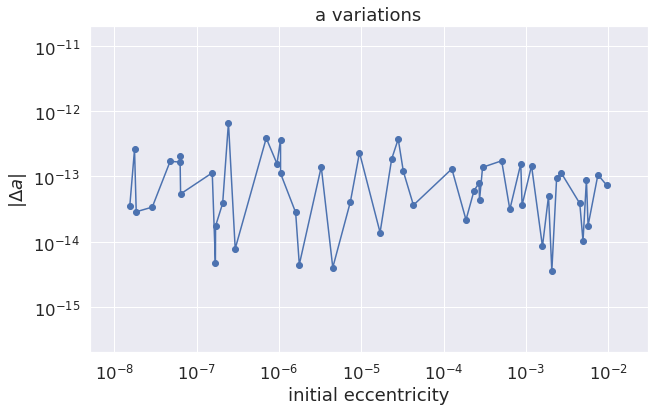

In [6]:
#plot each streamline's max|da| versus initial e
delta_a = np.abs(a[-1] - a[0])
delta_a_max = np.array([da.max() for da in delta_a])
e0 = e[0,:,0]
idx = e0.argsort()
e0 = e0[idx]
delta_a_max = delta_a_max[idx]
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(e0, delta_a_max, marker='o', linestyle='-')
p = ax.set_xscale('log')
p = ax.set_yscale('log')
p = ax.set_xlim(5.0e-9, 3.0e-2)
p = ax.set_ylim(2.0e-16, 2.0e-11)
p = ax.set_title('a variations')
p = ax.set_xlabel('initial eccentricity')
p = ax.set_ylabel('$|\Delta a|$')

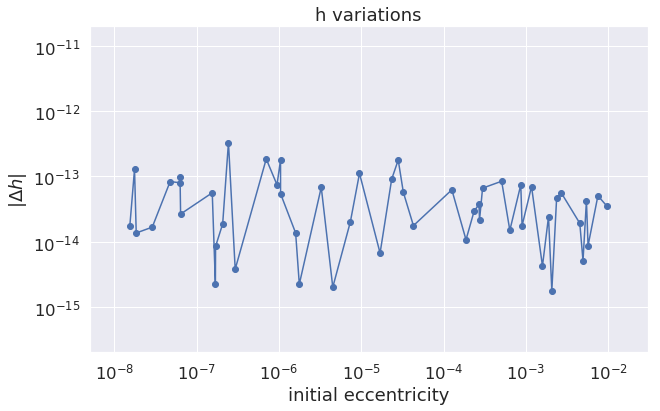

In [7]:
#plot each streamline's max|dh| versus initial e
h = r*vt
delta_h = np.abs(h[-1] - h[0])
delta_h_max = np.array([dh.max() for dh in delta_h])
e0 = e[0,:,0]
idx = e0.argsort()
e0 = e0[idx]
delta_h_max = delta_h_max[idx]
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(e0, delta_h_max, marker='o', linestyle='-')
p = ax.set_xscale('log')
p = ax.set_yscale('log')
p = ax.set_xlim(5.0e-9, 3.0e-2)
p = ax.set_ylim(2.0e-16, 2.0e-11)
p = ax.set_title('h variations')
p = ax.set_xlabel('initial eccentricity')
p = ax.set_ylabel('$|\Delta h|$')